In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import numpy as np

In [2]:
data_size = 500

In [3]:
data = np.stack((np.arange(data_size), np.arange(data_size)), axis=-1).astype(np.float64)
data[:10]

array([[ 0.,  0.],
       [ 1.,  1.],
       [ 2.,  2.],
       [ 3.,  3.],
       [ 4.,  4.],
       [ 5.,  5.],
       [ 6.,  6.],
       [ 7.,  7.],
       [ 8.,  8.],
       [ 9.,  9.]])

In [4]:
noise = np.random.rand(data_size, 2)
noise[:,0] *= np.random.randint(200, size=data_size)
noise[:,1] *= np.random.randint(200, size=data_size)
data += noise
data[:10]

array([[  54.39127691,   43.05277856],
       [  20.06451997,   22.44137935],
       [  55.29062362,   71.66229925],
       [  14.58853803,   92.6661334 ],
       [  47.21158547,   39.09611538],
       [   8.96019766,  103.93342197],
       [  30.0113437 ,  108.64828393],
       [  24.89330502,  163.42393589],
       [ 146.6402967 ,   94.03019844],
       [  74.37897459,   23.07274452]])

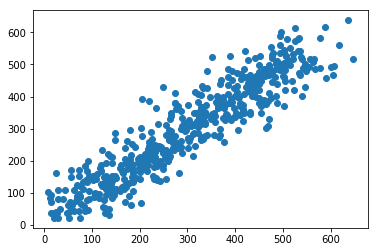

In [5]:
plt.scatter(data[:,0], data[:,1])
plt.show()

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = np.asarray(train_test_split(data[:,0], data[:,1], test_size=0.1))

In [7]:
class LR:
    def __init__(self, learning_rate=0.000001):
        self.m = 0
        self.b = 0
        self.lr = learning_rate
    
    def train(self, x, y):
        m = self.m
        b = self.b
        d_m = np.mean(2 * (m * x + b - y) * x)
        d_b = np.mean(2 * (m * x + b - y))
        
        self.m = self.m - self.lr * d_m
        self.b = self.m - self.lr * d_b
    
    def loss(self, x, y):
        return np.mean(np.square(self.m * x + self.b - y))
    
    def predict(self, x):
        return self.m * x + self.b

In [8]:
model = LR()
for i in range(20):
    model.train(x_train, y_train)
    print(model.loss(x_test, y_test))

70417.6672021
43510.5006654
27342.0996859
17651.2177859
11862.124877
8419.09380886
6383.39851425
5189.33389019
4496.55354839
4100.73637962
3879.56851475
3760.10108328
3699.04166454
3670.8677619
3660.66800952
3659.83865012
3663.50268571
3668.96700853
3674.80389297
3680.30721666


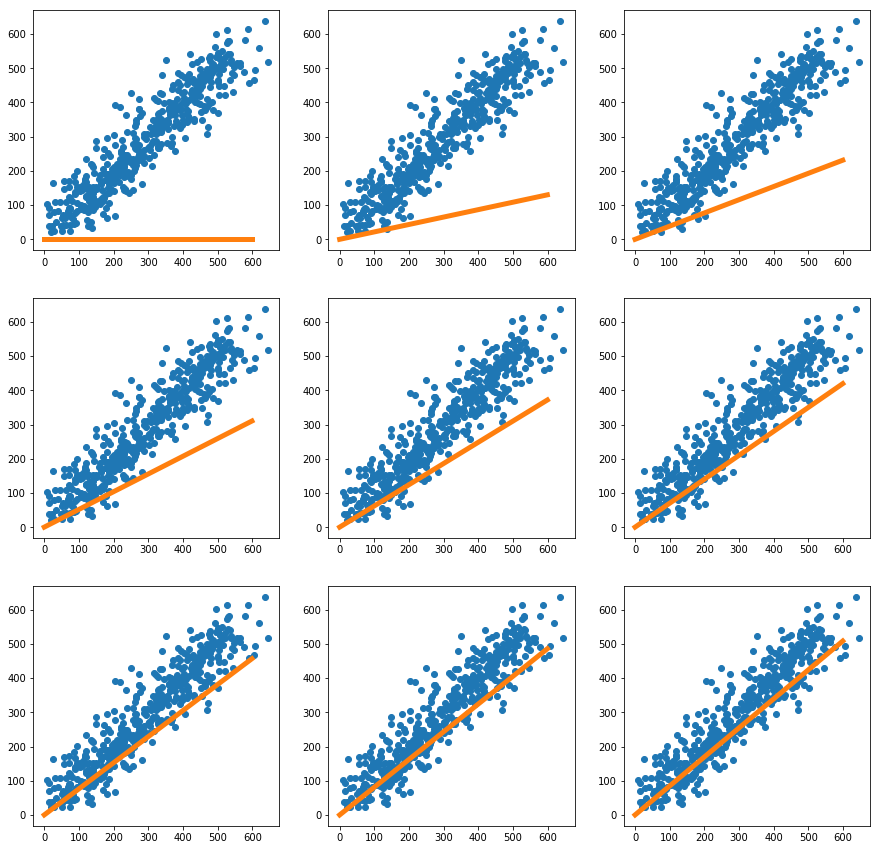

In [9]:
subplot = [331,332,333,334,335,336,337,338,339]

plt.figure(figsize=(15,15))

model = LR()

for sub in subplot:
    plt.subplot(sub)
    x_line = np.arange(0, 600).reshape(-1,1)
    plt.scatter(x_train, y_train)
    plt.plot(x_line, model.predict(x_line), color='C1', linewidth=5.0)
    model.train(x_train, y_train)

plt.show()

In [10]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x_train.reshape(-1,1), y_train.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
print('Score: ', reg.score(x_test.reshape(-1,1), y_test.reshape(-1,1)))

Score:  0.83324185244


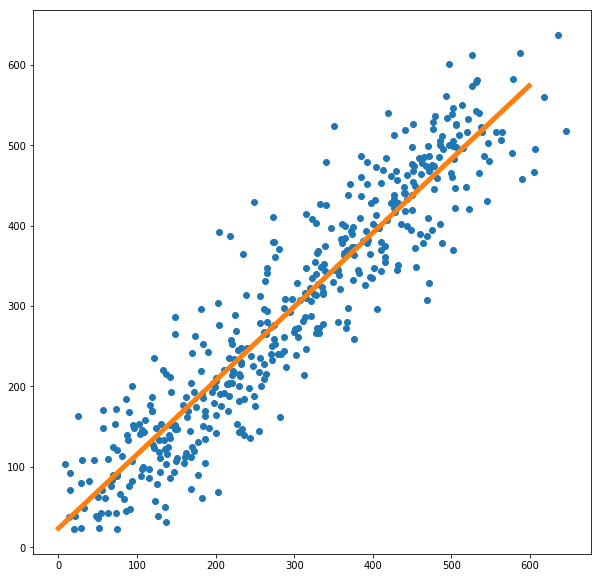

In [12]:
x_line = np.arange(0, 600).reshape(-1,1)
plt.figure(figsize=(10,10))
plt.scatter(x_train, y_train)
plt.plot(x_line, reg.predict(x_line), color='C1', linewidth=5.0)
plt.show()